In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
from scipy import stats

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

In [2]:
def draw_t_score(t_sample, alpha, dfreedom, direction, title):
    
    if direction == "<":
        tc = stats.t.ppf(alpha, dfreedom)
    elif direction == ">":
        tc = stats.t.ppf(1 - alpha, dfreedom)
    else:
        alpha = alpha/2
        tc = stats.t.ppf(1 - alpha, dfreedom)
    
    lim = math.ceil(max(3, abs(t_sample) + 1))
    x = np.arange(-lim, lim, 0.001)
    y = stats.t.pdf(x, dfreedom) #stats.norm.pdf(x, 0, 1)
    if direction == "<":
        t = x[x < tc]
    elif direction == ">":
        t = x[x > tc]
    else:
        t = x[x < -tc]
        t2 = x[x > tc]
        
    fig, ax = plt.subplots(figsize=(7,4))    
    ax.plot(x, y, color='black', lw=0.8)
    ax.fill_between(t, 0, stats.t.pdf(t, dfreedom), facecolor='0.7')
    if direction != "<" and direction != ">":
        ax.fill_between(t2, 0, stats.t.pdf(t2, dfreedom), facecolor='0.7')        

    ax.set(xbound =(-lim, lim), ybound = (0,0.5))
    
    # Insere anotação sobre a linha de t do sample
    ax.annotate('t_sample = {:0.3f}'.format(t_sample), xy=(t_sample, 0), xytext=(0, 25),
            xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))
    
    # Insere anotação sobre a linha de t critico
    ax.annotate('t_c = ' + str(round(tc,3)) + '\nα = ' + str(alpha), xy=(tc, 0), xytext=(0, -25),
            xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
    
    if direction != "<" and direction != ">":
        # Insere anotação sobre a linha de t critico
        ax.annotate('-t_c = ' + str(round(-tc,3)) + '\nα = ' + str(alpha), xy=(-tc, 0), xytext=(0, -25),
                xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
                arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
    

# Segunda parte – Análise da variável Nota no ENEM

## Questão 2
Há uma grande preocupação em estimar o comportamento da variável Nota no ENEM dos alunos, de maneira a caracterizar melhor seu o perfil. Alguém da universidade sugeriu que você retirasse uma amostra de 25 alunos e registrasse os valores de Nota no ENEM3. Considere que a variância populacional de Nota no ENEM é DESCONHECIDA. Com base nos resultados encontrados responda os itens a seguir (lembre-se de excluir inicialmente as linhas com dados perdidos).

### 2.a) Construa um gráfico de probabilidade normal para os valores da amostra.

In [3]:
N = 25
dfreedom = N - 1
sampleENEM = random.sample(df["Nota ENEM"].dropna().tolist(), N)
sample_mean = np.mean(sampleENEM)
sample_std = np.std(sampleENEM)

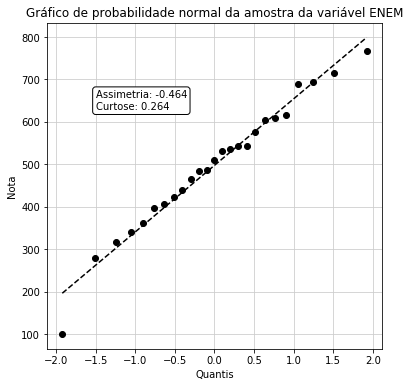

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
plot = stats.probplot(sampleENEM, plot=ax)
ax.set(title="Gráfico de probabilidade normal da amostra da variável ENEM")
ax.set(xlabel="Quantis", ylabel="Nota")
ax.grid(color=default_grid_color)

ax.get_lines()[0].set(color = 'black')
ax.get_lines()[1].set(color = 'black', ls = 'dashed')

# Insere informação adicional
ax.text(-1.5, 650, "Assimetria: " + str(round(stats.skew(sampleENEM),3)) + "\nCurtose: " + str(round(stats.kurtosis(sampleENEM),3)), va="center", ha="left",
        bbox=dict(boxstyle="round", alpha=1, fc='white'))

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q2a.png', bbox_inches='tight', dpi=dpi)

### 2.a.1 - É possível considerar que os dados provêm de uma população com distribuição normal? JUSTIFIQUE.

Ver depois

### 2.a.2 – Com base na resposta da letra a.1 você recomendaria a utilização de técnicas como Intervalo de confiança e teste paramétrico de média? JUSTIFIQUE.

Ver depois (utilizar teste t)

### 2.b) Independente dos resultados da letra a), encontre o intervalo de 95% de confiança para a média populacional. Interprete o resultado.

In [5]:
alpha = 0.05
tc = stats.t.ppf(1-alpha, dfreedom)

error_95 = tc * sample_std / math.sqrt(N)
interval_95 = (sample_mean - error_95, sample_mean, sample_mean + error_95)
print("Para o indíce de confiança de 95%, foi encontrado um erro de {0} sobre a média amostral {1}, produzindo um intervalo de {2} a {3}".format(
        round(error_95,2), round(interval_95[1],2), round(interval_95[0],2), round(interval_95[2],2)))

Para o indíce de confiança de 95%, foi encontrado um erro de 51.01 sobre a média amostral 497.56, produzindo um intervalo de 446.55 a 548.57


### 2.c) Independente dos resultados da letra a), qual seria o tamanho mínimo de amostra necessário para obter um intervalo de 95% de confiança para a média populacional da Nota no ENEM, com uma precisão de 5 pontos? A amostra coletada é suficiente? JUSTIFIQUE.

In [6]:
print("O tamanho mínimo de intervalo é de " + str(math.ceil((tc * sample_std/5)**2)) + " amostras.")

O tamanho mínimo de intervalo é de 2603 amostras.


### d) Independente dos resultados da letra a), a direção da TYU acredita que a média de Nota no ENEM dos alunos é maior do que 450 pontos, por pesquisas anteriores. Aplicando o teste estatístico apropriado, os dados confirmam isso, a 5% de significância? JUSTIFIQUE.

Vamos utilizar o teste t (justificar)
H0: Nota ENEM <= 450
H1: Nota ENEM >  450
Alpha = 5% (cauda direita)

In [7]:
alpha = 0.05
hyp_mean = 450
tc = stats.t.ppf(1-alpha, dfreedom)
t = (sample_mean - hyp_mean)/(sample_std/math.sqrt(dfreedom))
p = 1 - stats.t.cdf(t, df=dfreedom)

In [8]:
print("Como o valor p {0} é menor? que o índice de confiança (alpha) para esta situação ({1}), a suposição H0 de que a nota do enem não é superior a 450 é rejeitada. Portanto, é possível dizer com 95% de certeza que a média da nota do ENEM é superior a 450 pontos.".format(round(p,4),round(alpha,4)))

Como o valor p 0.0656 é menor? que o índice de confiança (alpha) para esta situação (0.05), a suposição H0 de que a nota do enem não é superior a 450 é rejeitada. Portanto, é possível dizer com 95% de certeza que a média da nota do ENEM é superior a 450 pontos.


In [9]:
sample_mean

497.56

In [10]:
t

1.562814277952079

In [11]:
tc

1.7108820799094275

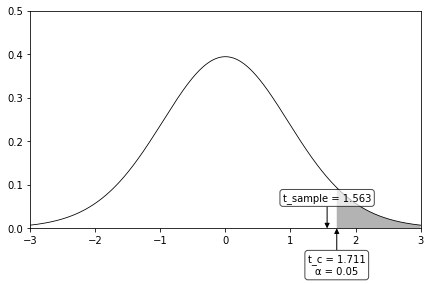

In [12]:
draw_t_score(t_sample = t, alpha=alpha, dfreedom = dfreedom, direction = '>', title = 't')

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q2d.png', bbox_inches='tight', dpi=dpi)

### e) Analise o intervalo de confiança da letra b). Os limites encontrados corroboram os resultados encontrados na letra d)? JUSTIFIQUE.

In [13]:
print("Sim, como há 95% de certeza que a média se encontra entre {0} e {1}, a afirmação de que há pelo menos 95% de certeza da média estar acima de 450 pontos faz sentido também.".format(round(interval_95[0],2), round(interval_95[2],2)))

Sim, como há 95% de certeza que a média se encontra entre 446.55 e 548.57, a afirmação de que há pelo menos 95% de certeza da média estar acima de 450 pontos faz sentido também.


### f) Independente dos resultados da letra a), suponha 5% de significância e o desvio padrão amostral como boa estimativa do desvio padrão populacional. Se a média real da Nota no ENEM fosse de 470 pontos, qual seria o poder do teste? Você acha o valor aceitável? JUSTIFIQUE.

H0: Nota ENEM = 470 H1: Nota ENEM != 470 Alpha = 5% (cauda dupla)

In [14]:
pop_std = sample_std/math.sqrt(N)
pop_mean = 470
alpha = 0.05

tc = stats.t.ppf(1-alpha/2, dfreedom)
t = (sample_mean - pop_mean)/pop_std
p = 1 - stats.t.cdf(t, df=dfreedom)

In [15]:
print("Com o P valendo {0} < 0.025, o teste rejeita a hipótese de que a média populacional é 470".format(round(p,3)))

Com o P valendo 0.182 < 0.025, o teste rejeita a hipótese de que a média populacional é 470


### g) Independente dos resultados da letra a), qual deveria ser o tamanho mínimo de amostra para detectar com 95% de probabilidade que a média da Nota no ENEM dos alunos é igual a 470 pontos. Suponha 5% de significância e o desvio padrão amostral como boa estimativa do desvio padrão populacional. A amostra coletada é suficiente? JUSTIFIQUE.

In [16]:
alpha = 0.05
tc = stats.t.ppf(1-alpha/2, dfreedom)
pop_mean = 470
n_min = math.ceil((sample_std * tc / (sample_mean - pop_mean))**2)
print(n_min)

125
